In [1]:
# Import Dependencies
import json
import requests
import pprint
import pandas as pd
import matplotlib.pyplot as plt
# Import the EIA API key
from project_config import EIA_api_key

### Generator Report API Pull - January 2020 to January 2023

In [2]:
# Define the API key
api_key = EIA_api_key
count = 0
json_array = []

# Loop to pull API results given 5000 results limit
for i in range(0,12):
    offset = 5000 * count
    url = f"https://api.eia.gov/v2/electricity/operating-generator-capacity/data/?api_key={api_key}&frequency=monthly&data[0]=latitude&data[1]=longitude&facets[stateid][]=TX&start=2020-01&end=2023-01&sort[0][column]=period&sort[0][direction]=desc&sort[1][column]=entityid&sort[1][direction]=asc&sort[2][column]=plantid&sort[2][direction]=asc&sort[3][column]=generatorid&sort[3][direction]=asc&offset={offset}&length=5000"

    # Send the API request
    response = requests.get(url)
    response.raise_for_status()

    # Retrieve the data
    data = response.json()
    data_clean = data["response"]["data"]
    for item in data_clean:
        json_array.append(item)
    count = count + 1
        


In [3]:
# Create Dataframe of Generator data
generator_full_df = pd.json_normalize(json_array)
print("Rows in Dataframe: ", len(generator_full_df))
generator_full_df.head()

Rows in Dataframe:  56365


,period,stateid,stateName,sector,sectorName,entityid,entityName,plantid,plantName,generatorid,...,energy_source_code,energy-source-desc,prime_mover_code,balancing_authority_code,balancing-authority-name,status,statusDescription,latitude,longitude,unit
0,2023-01,TX,Texas,ipp-non-chp,IPP Non-CHP,313,"Wolf Hollow I Power, LLC",55139,Wolf Hollow I LP,CTG1,...,NG,Natural Gas,CT,None,None,OP,Operating,32.33422,-97.731686,BLK1
1,2023-01,TX,Texas,ipp-non-chp,IPP Non-CHP,313,"Wolf Hollow I Power, LLC",55139,Wolf Hollow I LP,CTG2,...,NG,Natural Gas,CT,None,None,OP,Operating,32.33422,-97.731686,BLK1
2,2023-01,TX,Texas,ipp-non-chp,IPP Non-CHP,313,"Wolf Hollow I Power, LLC",55139,Wolf Hollow I LP,ST,...,NG,Natural Gas,CA,None,None,OP,Operating,32.33422,-97.731686,BLK1
3,2023-01,TX,Texas,industrial-chp,Industrial CHP,327,Air Liquide Large Industries U S LP,10298,Bayou Cogen Plant,GT1,...,NG,Natural Gas,GT,None,None,OP,Operating,29.62250,-95.045800,None
4,2023-01,TX,Texas,industrial-chp,Industrial CHP,327,Air Liquide Large Industries U S LP,10298,Bayou Cogen Plant,GT2,...,NG,Natural Gas,GT,None,None,OP,Operating,29.62250,-95.045800,None


In [4]:
# Confirm there are no duplicates in dataset as a result of for loop
generator_updated_df = generator_full_df.drop_duplicates()
print("Rows in Dataframe: ", len(generator_updated_df))
generator_updated_df.head()

Rows in Dataframe:  56365


,period,stateid,stateName,sector,sectorName,entityid,entityName,plantid,plantName,generatorid,...,energy_source_code,energy-source-desc,prime_mover_code,balancing_authority_code,balancing-authority-name,status,statusDescription,latitude,longitude,unit
0,2023-01,TX,Texas,ipp-non-chp,IPP Non-CHP,313,"Wolf Hollow I Power, LLC",55139,Wolf Hollow I LP,CTG1,...,NG,Natural Gas,CT,None,None,OP,Operating,32.33422,-97.731686,BLK1
1,2023-01,TX,Texas,ipp-non-chp,IPP Non-CHP,313,"Wolf Hollow I Power, LLC",55139,Wolf Hollow I LP,CTG2,...,NG,Natural Gas,CT,None,None,OP,Operating,32.33422,-97.731686,BLK1
2,2023-01,TX,Texas,ipp-non-chp,IPP Non-CHP,313,"Wolf Hollow I Power, LLC",55139,Wolf Hollow I LP,ST,...,NG,Natural Gas,CA,None,None,OP,Operating,32.33422,-97.731686,BLK1
3,2023-01,TX,Texas,industrial-chp,Industrial CHP,327,Air Liquide Large Industries U S LP,10298,Bayou Cogen Plant,GT1,...,NG,Natural Gas,GT,None,None,OP,Operating,29.62250,-95.045800,None
4,2023-01,TX,Texas,industrial-chp,Industrial CHP,327,Air Liquide Large Industries U S LP,10298,Bayou Cogen Plant,GT2,...,NG,Natural Gas,GT,None,None,OP,Operating,29.62250,-95.045800,None


In [5]:
# Create Sector Dataframe to store sectorID and name
sector_df = generator_full_df[["sector", "sectorName"]].drop_duplicates(ignore_index=True)
sector_df = sector_df.set_index("sector")
sector_df

,sectorName
sector,
ipp-non-chp,IPP Non-CHP
industrial-chp,Industrial CHP
electric-utility,Electric Utility
ipp-chp,IPP CHP
industrial-non-chp,Industrial Non-CHP
commercial-chp,Commercial CHP
commercial-non-chp,Commercial Non-CHP


In [6]:
# Create Entity Dataframe to store entityID and name
entity_df = generator_full_df[["entityid", "entityName"]].drop_duplicates(ignore_index=True)
entity_df

,entityid,entityName
0,313,"Wolf Hollow I Power, LLC"
1,327,Air Liquide Large Industries U S LP
2,429,Occidental Permian Ltd
3,914,Total Petrochemicals USA Inc
4,1015,Austin Energy
...,...,...
395,62811,Sherbino Mesa I Windfarm LLC
396,63713,CatanSolar
397,63884,Oklaunion Power Station
398,16668,Sabine Cogen LP


In [7]:
# Remove duplicate entityIDs due to spelling or capitalization differences
entity_df_clean = entity_df.drop_duplicates(subset="entityid")
entity_df_clean = entity_df_clean.set_index("entityid")
entity_df_clean

,entityName
entityid,
313,"Wolf Hollow I Power, LLC"
327,Air Liquide Large Industries U S LP
429,Occidental Permian Ltd
914,Total Petrochemicals USA Inc
1015,Austin Energy
...,...
62811,Sherbino Mesa I Windfarm LLC
63713,CatanSolar
63884,Oklaunion Power Station


In [8]:
# Create Plant Dataframe to store plantID and name
plant_df = generator_full_df[["plantid", "plantName"]].drop_duplicates(ignore_index=True)
plant_df

,plantid,plantName
0,55139,Wolf Hollow I LP
1,10298,Bayou Cogen Plant
2,54748,Port Neches Plant
3,52122,Wasson CO2 Removal Plant
4,10568,Port Arthur Texas Refinery
...,...,...
755,56779,Sherbino I Wind Farm
756,127,Oklaunion
757,3477,Lone Star
758,55104,Sabine Cogen


In [9]:
# Remove duplicate plantIDs due to spelling or capitalization differences
plant_df_clean = plant_df.drop_duplicates(subset="plantid")
plant_df_clean = plant_df_clean.set_index("plantid")
plant_df_clean

,plantName
plantid,
55139,Wolf Hollow I LP
10298,Bayou Cogen Plant
54748,Port Neches Plant
52122,Wasson CO2 Removal Plant
10568,Port Arthur Texas Refinery
...,...
56779,Sherbino I Wind Farm
127,Oklaunion
3477,Lone Star


In [10]:
# Create State Dataframe to store statusID and name
state_df = generator_full_df[["stateid", "stateName"]].drop_duplicates(ignore_index=True)
state_df = state_df.set_index("stateid")
state_df

,stateName
stateid,
TX,Texas


In [11]:
# Create Status Dataframe to store statusID and description
status_df = generator_full_df[["status", "statusDescription"]].drop_duplicates(ignore_index=True)
status_df = status_df.set_index("status")
status_df

,statusDescription
status,
OP,Operating
SB,Standby/Backup: available for service but not ...
OS,Out of service and NOT expected to return to s...
OA,Out of service but expected to return to servi...


In [12]:
# Create Energy Source Dataframe to store statusID and description
sources_df = generator_full_df[["energy_source_code", "energy-source-desc"]].drop_duplicates(ignore_index=True).sort_values(by=["energy_source_code"])
sources_df = sources_df.set_index("energy_source_code")
sources_df

,energy-source-desc
energy_source_code,
AB,Agriculture Byproducts
BFG,Blast-Furnace Gas
BLQ,Black Liquor
DFO,Disillate Fuel Oil
LFG,Landfill Gas
LIG,Lignite
MWH,Electricity used for energy storage
NG,Natural Gas
NUC,Nuclear


In [13]:
# Confirm whether this column is blank for all rows - if blank for all, can delete from dataframe
balancing_authorities = generator_full_df["balancing-authority-name"].unique()
balancing_authorities

array([None, 'Electric Reliability Council of Texas, Inc.',
       'Midcontinent Independent Transmission System Operator, Inc..',
       'Southwest Power Pool', 'El Paso Electric Company',
       'Public Service Company of New Mexico'], dtype=object)

In [14]:
# Drop columns to create summarized generator dataframe
generators_clean_df = generator_full_df.drop(columns=["stateName", "sectorName", "entityName", "plantName", "statusDescription", "energy-source-desc", "unit"])
generators_clean_df.head()

,period,stateid,sector,entityid,plantid,generatorid,technology,energy_source_code,prime_mover_code,balancing_authority_code,balancing-authority-name,status,latitude,longitude
0,2023-01,TX,ipp-non-chp,313,55139,CTG1,Natural Gas Fired Combined Cycle,NG,CT,None,None,OP,32.33422,-97.731686
1,2023-01,TX,ipp-non-chp,313,55139,CTG2,Natural Gas Fired Combined Cycle,NG,CT,None,None,OP,32.33422,-97.731686
2,2023-01,TX,ipp-non-chp,313,55139,ST,Natural Gas Fired Combined Cycle,NG,CA,None,None,OP,32.33422,-97.731686
3,2023-01,TX,industrial-chp,327,10298,GT1,Natural Gas Fired Combustion Turbine,NG,GT,None,None,OP,29.62250,-95.045800
4,2023-01,TX,industrial-chp,327,10298,GT2,Natural Gas Fired Combustion Turbine,NG,GT,None,None,OP,29.62250,-95.045800


In [15]:
# Export all Dataframes to CSV for importing into SQL
sector_df.to_csv("Output/Sector_DF.csv")
entity_df_clean.to_csv("Output/Entity_DF.csv")
plant_df_clean.to_csv("Output/Plant_DF.csv")
status_df.to_csv("Output/Status_DF.csv")
state_df.to_csv("Output/States_DF.csv")
sources_df.to_csv("Output/Energy_Sources_DF.csv")
generators_clean_df.to_csv("Output/Generators_DF.csv")

### Price Details API Pull - January 2020 to January 2023

In [16]:
# Price Details
url = f"https://api.eia.gov/v2/natural-gas/pri/sum/data/?api_key={api_key}&frequency=monthly&data[0]=value&facets[duoarea][]=STX&start=2020-01&end=2023-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
response = requests.get(url)
response.raise_for_status()

# Retrieve the data
price_data = response.json()
pprint.pprint(price_data)

{'apiVersion': '2.1.4',
 'request': {'command': '/v2/natural-gas/pri/sum/data/',
             'params': {'api_key': 'msLbwqq4bJqp1UAFRX7ulbpXsXoju1uJalc0DDJz',
                        'data': ['value'],
                        'end': '2023-01',
                        'facets': {'duoarea': ['STX']},
                        'frequency': 'monthly',
                        'length': 5000,
                        'offset': 0,
                        'sort': [{'column': 'period', 'direction': 'desc'}],
                        'start': '2020-01'}},
 'response': {'data': [{'area-name': 'TEXAS',
                        'duoarea': 'STX',
                        'period': '2022-12',
                        'process': 'PEU',
                        'process-name': 'Electric Power Price',
                        'product': 'EPG0',
                        'product-name': 'Natural Gas',
                        'series': 'N3045TX3',
                        'series-description': 'Texas Natural Gas Pri

In [17]:
# Create Dataframe of Price data
price_data_df = pd.json_normalize(price_data["response"]["data"])
print("Rows in Dataframe: ", len(price_data_df))
price_data_df.head()
# Note there are fewer rows than it states on the API dashboard because the final 2 pages of API results are blank

Rows in Dataframe:  288


,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2022-12,STX,TEXAS,EPG0,Natural Gas,PEU,Electric Power Price,N3045TX3,Texas Natural Gas Price Sold to Electric Power...,5.34,$/MCF
1,2022-12,STX,TEXAS,EPG0,Natural Gas,PRS,Price Delivered to Residential Consumers,N3010TX3,Texas Price of Natural Gas Delivered to Reside...,16.01,$/MCF
2,2022-12,STX,TEXAS,EPG0,Natural Gas,VRX,Percent Sold to The Commercial Sector,NA1504_STX_4,Texas Natural Gas % of Total Residential - Sal...,99.90,%
3,2022-12,STX,TEXAS,EPG0,Natural Gas,VFA,% of Industrial Consumers - Sales,N3035TX4,Percent of Industrial Natural Gas Deliveries i...,28.60,%
4,2022-12,STX,TEXAS,EPG0,Natural Gas,VFC,Percent Sold to The Residential Consumers,N3020TX4,Percent of Commercial Natural Gas Deliveries i...,75.90,%


In [18]:
# Create Series Dataframe to store seriesID and description
series_df = price_data_df[["series", "series-description"]].drop_duplicates(ignore_index=True)
series_df = series_df.set_index("series")
series_df

,series-description
series,
N3045TX3,Texas Natural Gas Price Sold to Electric Power...
N3010TX3,Texas Price of Natural Gas Delivered to Reside...
NA1504_STX_4,Texas Natural Gas % of Total Residential - Sal...
N3035TX4,Percent of Industrial Natural Gas Deliveries i...
N3020TX4,Percent of Commercial Natural Gas Deliveries i...
N3020TX3,Texas Price of Natural Gas Sold to Commercial ...
N3050TX3,Natural Gas Citygate Price in Texas (Dollars p...
N3035TX3,Texas Natural Gas Industrial Price (Dollars pe...


In [19]:
# Create Process Dataframe to store processID and name
process_df = price_data_df[["process", "process-name"]].drop_duplicates(ignore_index=True)
process_df = process_df.set_index("process")
process_df

,process-name
process,
PEU,Electric Power Price
PRS,Price Delivered to Residential Consumers
VRX,Percent Sold to The Commercial Sector
VFA,% of Industrial Consumers - Sales
VFC,Percent Sold to The Residential Consumers
PCS,Price Delivered to Commercial Sectors
PG1,City Gate Price
PIN,Industrial Price


In [42]:
# Drop duplicate or irrelevant columns to create clean price dataframe
price_df_clean = price_data_df.drop(columns=["duoarea", "product", "process-name", "series-description"])
price_df_clean.head()

,period,area-name,product-name,process,series,value,units
0,2022-12,TEXAS,Natural Gas,PEU,N3045TX3,5.34,$/MCF
1,2022-12,TEXAS,Natural Gas,PRS,N3010TX3,16.01,$/MCF
2,2022-12,TEXAS,Natural Gas,VRX,NA1504_STX_4,99.90,%
3,2022-12,TEXAS,Natural Gas,VFA,N3035TX4,28.60,%
4,2022-12,TEXAS,Natural Gas,VFC,N3020TX4,75.90,%


In [43]:
# Drop rows with % as unit, as we're only looking at price data, and delete blank rows
natural_gas_price_data_df = price_df_clean[price_df_clean.units != "%"].dropna()
natural_gas_price_data_df

,period,area-name,product-name,process,series,value,units
0,2022-12,TEXAS,Natural Gas,PEU,N3045TX3,5.34,$/MCF
1,2022-12,TEXAS,Natural Gas,PRS,N3010TX3,16.01,$/MCF
5,2022-12,TEXAS,Natural Gas,PCS,N3020TX3,12.33,$/MCF
6,2022-12,TEXAS,Natural Gas,PG1,N3050TX3,6.82,$/MCF
7,2022-12,TEXAS,Natural Gas,PIN,N3035TX3,6.52,$/MCF
...,...,...,...,...,...,...,...
281,2020-01,TEXAS,Natural Gas,PCS,N3020TX3,5.57,$/MCF
283,2020-01,TEXAS,Natural Gas,PIN,N3035TX3,2.32,$/MCF
284,2020-01,TEXAS,Natural Gas,PRS,N3010TX3,8.26,$/MCF
285,2020-01,TEXAS,Natural Gas,PEU,N3045TX3,1.93,$/MCF


In [44]:
natural_gas_price_data_df.loc[natural_gas_price_data_df["area-name"] == "TEXAS", "area-name"] = "TX"
natural_gas_price_data_df

,period,area-name,product-name,process,series,value,units
0,2022-12,TX,Natural Gas,PEU,N3045TX3,5.34,$/MCF
1,2022-12,TX,Natural Gas,PRS,N3010TX3,16.01,$/MCF
5,2022-12,TX,Natural Gas,PCS,N3020TX3,12.33,$/MCF
6,2022-12,TX,Natural Gas,PG1,N3050TX3,6.82,$/MCF
7,2022-12,TX,Natural Gas,PIN,N3035TX3,6.52,$/MCF
...,...,...,...,...,...,...,...
281,2020-01,TX,Natural Gas,PCS,N3020TX3,5.57,$/MCF
283,2020-01,TX,Natural Gas,PIN,N3035TX3,2.32,$/MCF
284,2020-01,TX,Natural Gas,PRS,N3010TX3,8.26,$/MCF
285,2020-01,TX,Natural Gas,PEU,N3045TX3,1.93,$/MCF


In [45]:
# Export all Dataframes to CSV for importing into SQL
process_df.to_csv("Output/Processes_DF.csv")
natural_gas_price_data_df.to_csv("Output/Energy_Prices_DF.csv")
price_data_df.to_csv("Output/Prices_Full_report.csv")

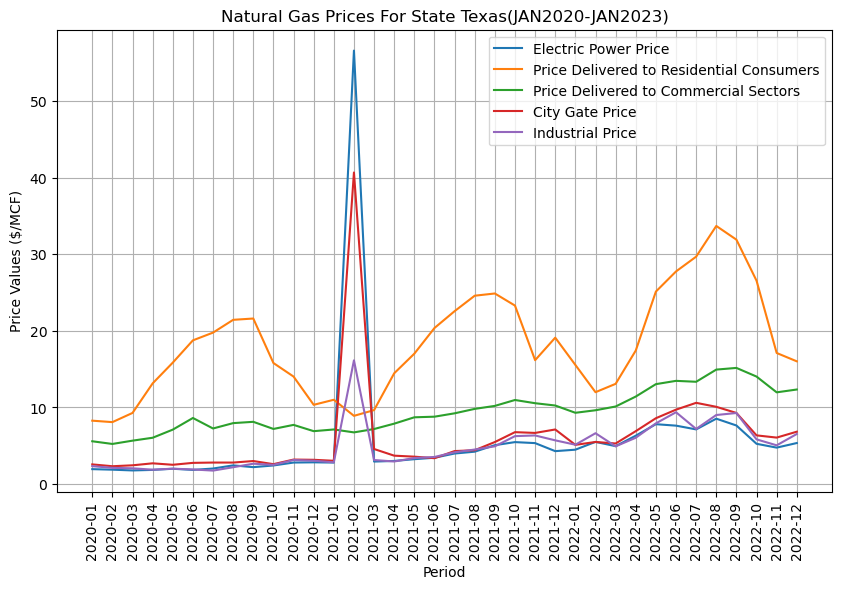

In [46]:
# Create Chart of Prices detail by sector
prices_df = natural_gas_price_data_df
PEU_price = prices_df[prices_df['process'] == 'PEU']
PRS_price = prices_df[prices_df['process'] == 'PRS']
PCS_price = prices_df[prices_df['process'] == 'PCS']
PG1_price = prices_df[prices_df['process'] == 'PG1']
PIN_price = prices_df[prices_df['process'] == 'PIN']

PEU_price = PEU_price.sort_values('period')
PRS_price = PRS_price.sort_values('period')
PCS_price = PCS_price.sort_values('period')
PG1_price = PG1_price.sort_values('period')
PIN_price = PIN_price.sort_values('period')

plt.figure(figsize=(10, 6))
plt.plot(PEU_price['period'], PEU_price['value'], label='Electric Power Price')
plt.plot(PRS_price['period'], PRS_price['value'], label='Price Delivered to Residential Consumers')
plt.plot(PCS_price['period'], PCS_price['value'], label='Price Delivered to Commercial Sectors')
plt.plot(PG1_price['period'], PG1_price['value'], label='City Gate Price')
plt.plot(PIN_price['period'], PIN_price['value'], label='Industrial Price')

plt.xlabel('Period')
plt.ylabel('Price Values ($/MCF)')
plt.title('Natural Gas Prices For State Texas(JAN2020-JAN2023)')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Industrial, Residential, Commerical, and CO2 Emissions API Pull - January 2020 to January 2023

In [24]:
# Define the API key and endpoint URL
api_key = EIA_api_key

# URL endpoint
url = f'https://api.eia.gov/v2/total-energy/data/?api_key={api_key}&frequency=monthly&data[0]=value&facets[msn][]=TXCCBUS&facets[msn][]=TXEIEUS&facets[msn][]=TXICBUS&facets[msn][]=TXRCBUS&start=2020-01&end=2023-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'
try:
    # Send the API request
    response = requests.get(url)
    response.raise_for_status()

    # Retrieve the data
    data = response.json()

    # Process the data as needed
    if "data" in data["response"]:
        # Extract the data
        pprint.pprint(data)
        
    else:
        print("No data available.")
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")

{'apiVersion': '2.1.4',
 'request': {'command': '/v2/total-energy/data/',
             'params': {'api_key': 'msLbwqq4bJqp1UAFRX7ulbpXsXoju1uJalc0DDJz',
                        'data': ['value'],
                        'end': '2023-01',
                        'facets': {'msn': ['TXCCBUS',
                                           'TXEIEUS',
                                           'TXICBUS',
                                           'TXRCBUS']},
                        'frequency': 'monthly',
                        'length': 5000,
                        'offset': 0,
                        'sort': [{'column': 'period', 'direction': 'desc'}],
                        'start': '2020-01'}},
 'response': {'data': [{'msn': 'TXCCBUS',
                        'period': '2023-01',
                        'seriesDescription': 'Total Primary Energy Consumed by '
                                             'the Commercial Sector in '
                                             'Trillion 

In [25]:
# Convert JSON file to Pandas Dataframe and confirm # of rows matches original file
data_df = pd.json_normalize(data["response"]["data"])
print("Rows in Dataframe: ", len(data_df))
data_df

Rows in Dataframe:  148


,period,msn,seriesDescription,value,unit
0,2023-01,TXCCBUS,Total Primary Energy Consumed by the Commercia...,621.730,Trillion Btu
1,2023-01,TXEIEUS,Total Energy Electric Power Sector CO2 Emissio...,117.289,Million Metric Tons of Carbon Dioxide
2,2023-01,TXICBUS,Total Primary Energy Consumed by the Industria...,1953.793,Trillion Btu
3,2023-01,TXRCBUS,Total Primary Energy Consumed by the Residenti...,1045.863,Trillion Btu
4,2022-12,TXICBUS,Total Primary Energy Consumed by the Industria...,1863.020,Trillion Btu
...,...,...,...,...,...
143,2020-02,TXICBUS,Total Primary Energy Consumed by the Industria...,1888.423,Trillion Btu
144,2020-01,TXCCBUS,Total Primary Energy Consumed by the Commercia...,627.259,Trillion Btu
145,2020-01,TXICBUS,Total Primary Energy Consumed by the Industria...,2013.471,Trillion Btu
146,2020-01,TXEIEUS,Total Energy Electric Power Sector CO2 Emissio...,120.822,Million Metric Tons of Carbon Dioxide


In [70]:
con_series_df = data_df[["msn", "seriesDescription"]].drop_duplicates(ignore_index=True)
con_series_df = con_series_df.rename(columns={"msn": "series", "seriesDescription": "series-description"}).set_index("series")
con_series_df

,series-description
series,
TXCCBUS,Total Primary Energy Consumed by the Commercia...
TXEIEUS,Total Energy Electric Power Sector CO2 Emissio...
TXICBUS,Total Primary Energy Consumed by the Industria...
TXRCBUS,Total Primary Energy Consumed by the Residenti...


In [71]:
larger_series_df = pd.merge(series_df, con_series_df, how="outer", on=["series", "series-description"])
larger_series_df

,series-description
series,
N3045TX3,Texas Natural Gas Price Sold to Electric Power...
N3010TX3,Texas Price of Natural Gas Delivered to Reside...
NA1504_STX_4,Texas Natural Gas % of Total Residential - Sal...
N3035TX4,Percent of Industrial Natural Gas Deliveries i...
N3020TX4,Percent of Commercial Natural Gas Deliveries i...
N3020TX3,Texas Price of Natural Gas Sold to Commercial ...
N3050TX3,Natural Gas Citygate Price in Texas (Dollars p...
N3035TX3,Texas Natural Gas Industrial Price (Dollars pe...
TXCCBUS,Total Primary Energy Consumed by the Commercia...


In [72]:
# Drop now-redundant column
data_df = data_df.drop(columns=["seriesDescription"])
data_df

,period,msn,value,unit
0,2023-01,TXCCBUS,621.730,Trillion Btu
1,2023-01,TXEIEUS,117.289,Million Metric Tons of Carbon Dioxide
2,2023-01,TXICBUS,1953.793,Trillion Btu
3,2023-01,TXRCBUS,1045.863,Trillion Btu
4,2022-12,TXICBUS,1863.020,Trillion Btu
...,...,...,...,...
143,2020-02,TXICBUS,1888.423,Trillion Btu
144,2020-01,TXCCBUS,627.259,Trillion Btu
145,2020-01,TXICBUS,2013.471,Trillion Btu
146,2020-01,TXEIEUS,120.822,Million Metric Tons of Carbon Dioxide


In [65]:
# Export Dataframe to CSV for importing into SQL
data_df.to_csv("Output/Consumption_and_CO2.csv")

In [26]:
# Create separate dataframes for each MSN (Unique series identifier)
dataframes = {}

# Get unique values from the 'msn' column
unique_msn = data_df['msn'].unique()

# Split the data based on unique 'msn' values
for msn in unique_msn:
    dataframes[msn] = data_df[data_df['msn'] == msn].copy()

# Access the individual dataframes using the 'msn' as the key
df_txicbus = dataframes['TXICBUS']
df_txrcbus = dataframes['TXRCBUS']
df_txccbus = dataframes['TXCCBUS']
df_txeieus = dataframes['TXEIEUS']

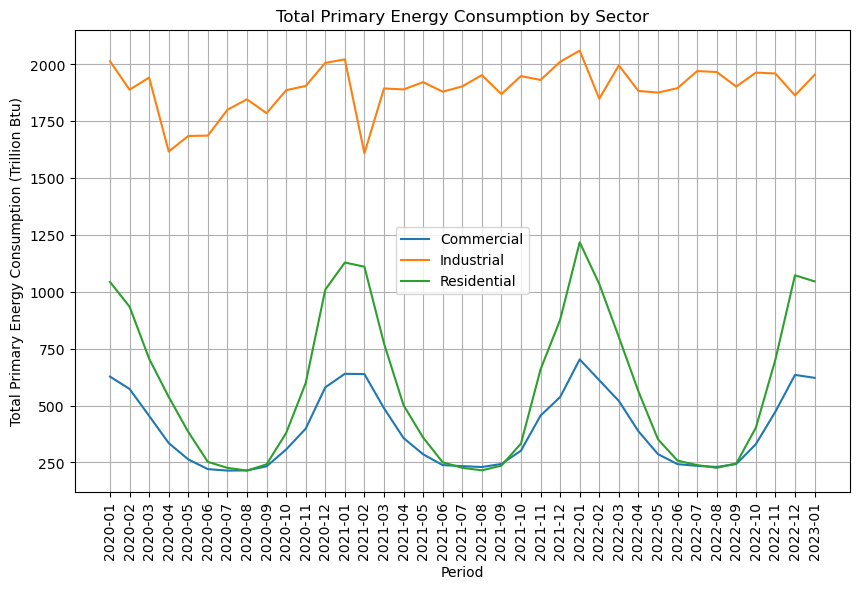

<Figure size 640x480 with 0 Axes>

In [40]:
# Char of Total Primary Energy Consumption by Sector
df = data_df
# Filter data for each category
commercial_data = df[df['msn'] == 'TXCCBUS']
industrial_data = df[df['msn'] == 'TXICBUS']
residential_data = df[df['msn'] == 'TXRCBUS']
co2_emissions_data = df[df['msn'] == 'TXEIEUS']

# Sort data by 'period' column in ascending order
commercial_data = commercial_data.sort_values('period')
industrial_data = industrial_data.sort_values('period')
residential_data = residential_data.sort_values('period')
co2_emissions_data = co2_emissions_data.sort_values('period')

# Line plot of Total Primary Energy Consumption by Commercial, Industrial, and Residential sectors over time
plt.figure(figsize=(10, 6))
plt.plot(commercial_data['period'], commercial_data['value'], label='Commercial')
plt.plot(industrial_data['period'], industrial_data['value'], label='Industrial')
plt.plot(residential_data['period'], residential_data['value'], label='Residential')
plt.xlabel('Period')
plt.ylabel('Total Primary Energy Consumption (Trillion Btu)')
plt.title('Total Primary Energy Consumption by Sector')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
plt.savefig('Images/energy_consumption.png', dpi=300)

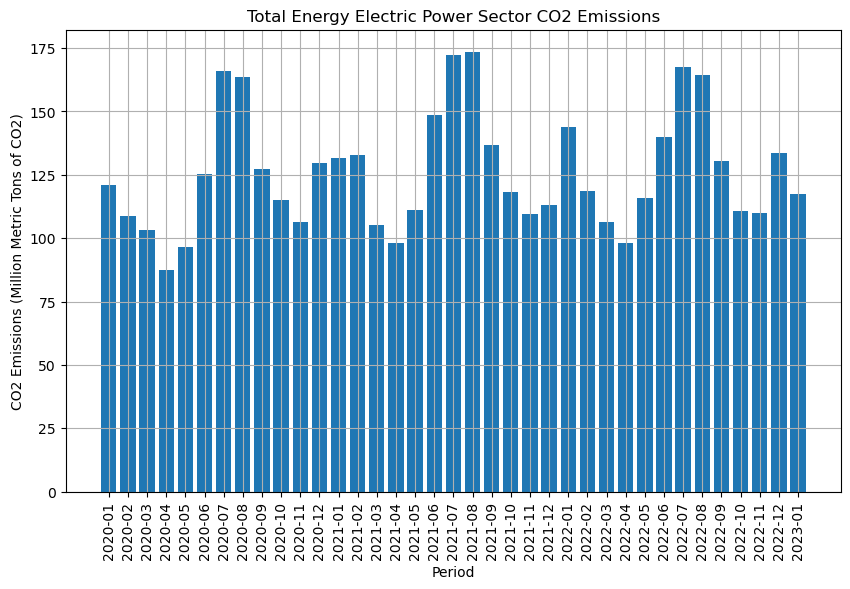

<Figure size 640x480 with 0 Axes>

In [39]:
# Bar plot of Total Energy Electric Power Sector CO2 Emissions over time
plt.figure(figsize=(10, 6))
plt.bar(co2_emissions_data['period'], co2_emissions_data['value'])
plt.xlabel('Period')
plt.ylabel('CO2 Emissions (Million Metric Tons of CO2)')
plt.title('Total Energy Electric Power Sector CO2 Emissions')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.savefig('Images/co2_emissions.png', dpi=300)

### Net Power Consumption and Generation API Pull - January 2020 to January 2023

In [30]:
# URL endpoint
url = f'https://api.eia.gov/v2/steo/data/?api_key={api_key}&frequency=monthly&data[0]=value&facets[seriesId][]=CLEPCNS_TX&facets[seriesId][]=CLEPGEN_TX&facets[seriesId][]=NGEPCNS_TX&facets[seriesId][]=NGEPGEN_TX&facets[seriesId][]=PAEPCNS_TX&facets[seriesId][]=PAEPGEN_TX&start=2020-01&end=2023-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'
try:
    # Send the API request
    response = requests.get(url)
    response.raise_for_status()

    # Retrieve the data
    data = response.json()

    # Process the data as needed
    if "data" in data["response"]:
        # Extract the generator counts by location and energy source
        generator_counts = data["response"]["data"]
        pprint.pprint(data)
        
    else:
        print("No data available.")
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")

{'apiVersion': '2.1.4',
 'request': {'command': '/v2/steo/data/',
             'params': {'api_key': 'msLbwqq4bJqp1UAFRX7ulbpXsXoju1uJalc0DDJz',
                        'data': ['value'],
                        'end': '2023-01',
                        'facets': {'seriesId': ['CLEPCNS_TX',
                                                'CLEPGEN_TX',
                                                'NGEPCNS_TX',
                                                'NGEPGEN_TX',
                                                'PAEPCNS_TX',
                                                'PAEPGEN_TX']},
                        'frequency': 'monthly',
                        'length': 5000,
                        'offset': 0,
                        'sort': [{'column': 'period', 'direction': 'desc'}],
                        'start': '2020-01'}},
 'response': {'data': [{'period': '2023-01',
                        'seriesDescription': 'Electric power sector  '
                                

In [62]:
# Convert JSON file to Pandas Dataframe and confirm # of rows matches original file
gen_data_df = pd.json_normalize(data["response"]["data"])
print("Rows in Dataframe: ", len(gen_data_df))
gen_data_df

Rows in Dataframe:  222


,period,seriesId,seriesDescription,value,unit
0,2023-01,CLEPCNS_TX,"Electric power sector consumption of coal, Te...",2542.258000,thousand short tons
1,2023-01,PAEPGEN_TX,Electric power sector net generation from petr...,0.008990,billion kilowatthours
2,2023-01,CLEPGEN_TX,Electric power sector net generation from coal...,3.350762,billion kilowatthours
3,2023-01,NGEPGEN_TX,Electric power sector net generation from natu...,12.517534,billion kilowatthours
4,2023-01,NGEPCNS_TX,Electric power sector consumption of natural ...,103.396003,billion cubic feet
...,...,...,...,...,...
217,2020-01,CLEPGEN_TX,Electric power sector net generation from coal...,4.364575,billion kilowatthours
218,2020-01,PAEPGEN_TX,Electric power sector net generation from petr...,0.002527,billion kilowatthours
219,2020-01,NGEPGEN_TX,Electric power sector net generation from natu...,12.775476,billion kilowatthours
220,2020-01,PAEPCNS_TX,Electric power sector consumption of petroleu...,4.997000,thousand barrels


In [55]:
# Create series dataframe
gen_series_df = gen_data_df[["seriesId", "seriesDescription"]].drop_duplicates(ignore_index=True)
gen_series_df = gen_series_df.rename(columns={"seriesId": "series", "seriesDescription": "series-description"}).set_index("series")
gen_series_df

,series-description
series,
CLEPCNS_TX,"Electric power sector consumption of coal, Te..."
PAEPGEN_TX,Electric power sector net generation from petr...
CLEPGEN_TX,Electric power sector net generation from coal...
NGEPGEN_TX,Electric power sector net generation from natu...
NGEPCNS_TX,Electric power sector consumption of natural ...
PAEPCNS_TX,Electric power sector consumption of petroleu...


In [73]:
# Merge Series Dataframe to have complete set
full_series_df = pd.merge(larger_series_df, gen_series_df, how="outer", on=["series", "series-description"])
full_series_df

,series-description
series,
N3045TX3,Texas Natural Gas Price Sold to Electric Power...
N3010TX3,Texas Price of Natural Gas Delivered to Reside...
NA1504_STX_4,Texas Natural Gas % of Total Residential - Sal...
N3035TX4,Percent of Industrial Natural Gas Deliveries i...
N3020TX4,Percent of Commercial Natural Gas Deliveries i...
N3020TX3,Texas Price of Natural Gas Sold to Commercial ...
N3050TX3,Natural Gas Citygate Price in Texas (Dollars p...
N3035TX3,Texas Natural Gas Industrial Price (Dollars pe...
TXCCBUS,Total Primary Energy Consumed by the Commercia...


In [63]:
# Drop now-redundant column
gen_data_df = gen_data_df.drop(columns=["seriesDescription"])
gen_data_df

,period,seriesId,value,unit
0,2023-01,CLEPCNS_TX,2542.258000,thousand short tons
1,2023-01,PAEPGEN_TX,0.008990,billion kilowatthours
2,2023-01,CLEPGEN_TX,3.350762,billion kilowatthours
3,2023-01,NGEPGEN_TX,12.517534,billion kilowatthours
4,2023-01,NGEPCNS_TX,103.396003,billion cubic feet
...,...,...,...,...
217,2020-01,CLEPGEN_TX,4.364575,billion kilowatthours
218,2020-01,PAEPGEN_TX,0.002527,billion kilowatthours
219,2020-01,NGEPGEN_TX,12.775476,billion kilowatthours
220,2020-01,PAEPCNS_TX,4.997000,thousand barrels


In [74]:
# Export Dataframes to CSV for importing into SQL
full_series_df.to_csv("Output/Series_DF.csv")
gen_data_df.to_csv("Output/Generation_and_Consumption_DF.csv")

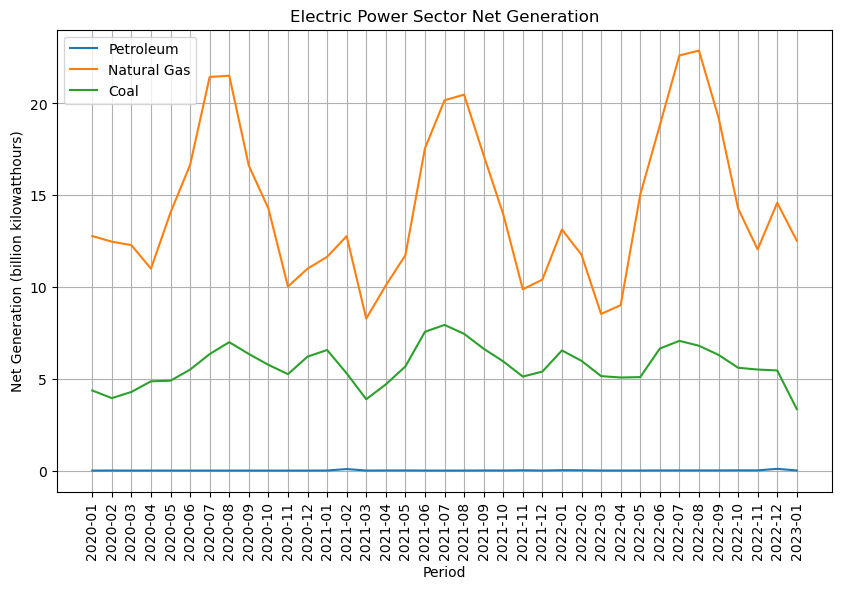

<Figure size 640x480 with 0 Axes>

In [66]:
df = gen_data_df
# Line plot of Electric Power Sector Net Generation from Petroleum, Natural Gas, and Coal
petroleum_generation = df[df['seriesId'] == 'PAEPGEN_TX']
natural_gas_generation = df[df['seriesId'] == 'NGEPGEN_TX']
coal_generation = df[df['seriesId'] == 'CLEPGEN_TX']
# Sort data by 'period' column in ascending order
petroleum_generation = petroleum_generation.sort_values('period')
natural_gas_generation = natural_gas_generation.sort_values('period')
coal_generation = coal_generation.sort_values('period')
plt.figure(figsize=(10, 6))
plt.plot(petroleum_generation['period'], petroleum_generation['value'], label='Petroleum')
plt.plot(natural_gas_generation['period'], natural_gas_generation['value'], label='Natural Gas')
plt.plot(coal_generation['period'], coal_generation['value'], label='Coal')
plt.xlabel('Period')
plt.ylabel('Net Generation (billion kilowatthours)')
plt.title('Electric Power Sector Net Generation')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.savefig('Images/net_generation.png', dpi=300)

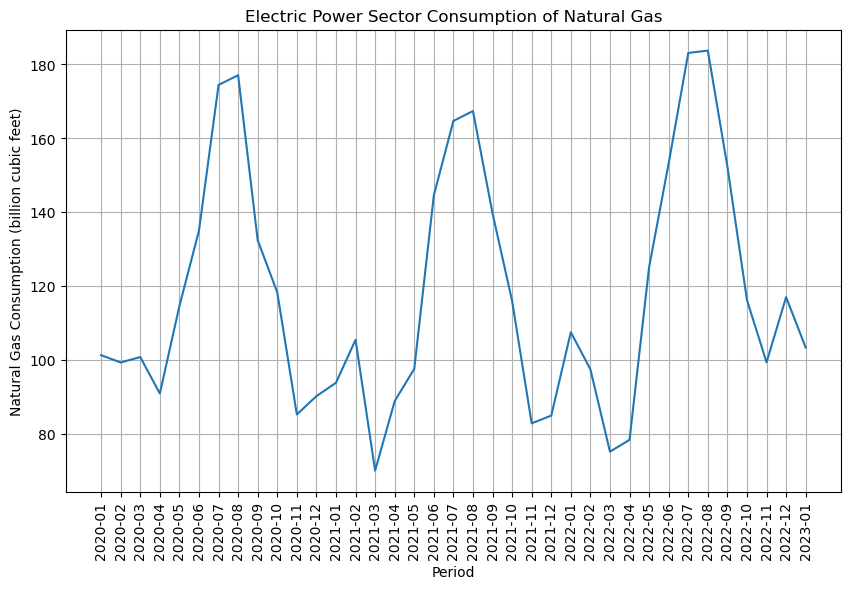

<Figure size 640x480 with 0 Axes>

In [67]:
# Line plot of Electric Power Sector Consumption of Natural Gas
natural_gas_consumption = df[df['seriesId'] == 'NGEPCNS_TX']
natural_gas_consumption = natural_gas_consumption.sort_values('period')
plt.figure(figsize=(10, 6))
plt.plot(natural_gas_consumption['period'], natural_gas_consumption['value'])
plt.xlabel('Period')
plt.ylabel('Natural Gas Consumption (billion cubic feet)')
plt.title('Electric Power Sector Consumption of Natural Gas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.savefig('Images/ng_consumption.png', dpi=300)

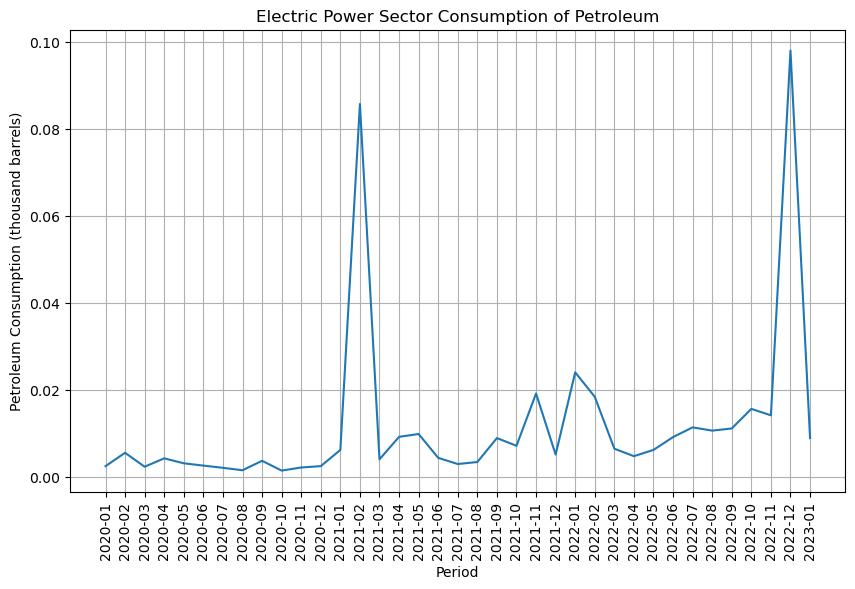

<Figure size 640x480 with 0 Axes>

In [68]:
# Line plot of Electric Power Sector Consumption of Petroleum
petroleum_consumption = df[df['seriesId'] == 'PAEPGEN_TX']
petroleum_consumption = petroleum_consumption.sort_values('period')
plt.figure(figsize=(10, 6))
plt.plot(petroleum_consumption['period'], petroleum_consumption['value'])
plt.xlabel('Period')
plt.ylabel('Petroleum Consumption (thousand barrels)')
plt.title('Electric Power Sector Consumption of Petroleum')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.savefig('Images/petroleum_consumption.png', dpi=300)

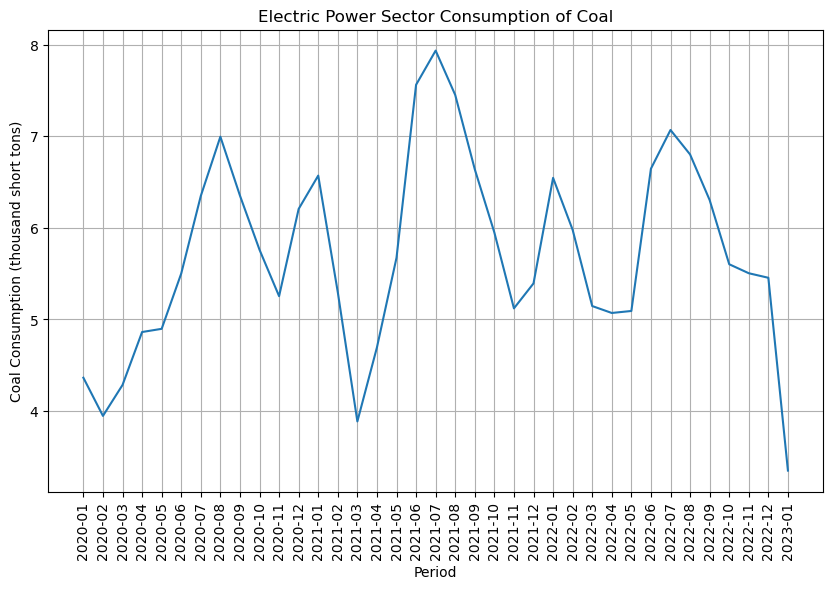

<Figure size 640x480 with 0 Axes>

In [69]:
# Line plot of Electric Power Sector Consumption of Coal
coal_consumption = df[df['seriesId'] == 'CLEPGEN_TX']
coal_consumption = coal_consumption.sort_values('period')
plt.figure(figsize=(10, 6))
plt.plot(coal_consumption['period'], coal_consumption['value'])
plt.xlabel('Period')
plt.ylabel('Coal Consumption (thousand short tons)')
plt.title('Electric Power Sector Consumption of Coal')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.savefig('Images/coal_consumption.png', dpi=300)